<a href="https://colab.research.google.com/github/DavBelM/Multimodal_Data_Preprocessing/blob/main/audios_g16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Sound Data Collection and Processing

Record at least 2 audio samples saying phrases like:
- “Yes, approve”

- “Confirm transaction”

Load and display sound samples as waveforms and spectrograms for each member
Apply at least two augmentations per sample (e.g., pitch shift, time stretch, background noise).
Extract and save features (e.g., MFCCs, spectral roll-off, energy) into audio_features.csv

## Importing Libraries

In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Loading Data

In [2]:
audio_paths = {
    "yes_approve" : "yes_approve_1.wav",
    "yes_approve" : "yes_approve_2.wav",
    "yes_approve" : "yes_approve_3.wav",
    "confirm_transaction" : "confirm_transaction_1.wav",
    "confirm_transaction" : "confirm_transaction_2.wav",
    "confirm_transaction" : "confirm_transaction_3.wav"
}

## Visualization Functions

In [3]:
def plot_waveform(y, sr, title):
  plt.figure(figsize=(10, 3))
  librosa.display.waveshow(y, sr=sr)
  plt.title(f"Waveform - {title}")
  plt.tight_layout
  plt.show()

In [4]:
def plot_spectrogram(y, sr, title):
  from librosa.feature import melspectrogram as _melspectrogram_func
  S = _melspectrogram_func(y=y, sr=sr, n_mels=128)
  S_dB = librosa.power_to_db(S, ref=np.max)

  plt.figure(figsize=(10, 4))
  librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
  plt.colorbar(format='%+2.0f dB')
  plt.tight_layout()
  plt.show()

## Augmentations

In [5]:
def augment_audio(y, sr):
  aug1 = librosa.effects.pitch_shift(y=y, sr=sr, n_steps=2)
  aug2 = librosa.effects.time_stretch(y, rate = 1.2)
  aug3 = y + 0.005 * np.random.randn(len(y))
  return{"pitch_shift":aug1, "time_stretch":aug2, "noise":aug3}

## Feature Extraction

In [6]:
def extract_features(y, sr, label):
  mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).mean(axis=1)
  rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr).mean()
  energy = np.sum(y**2)

  feature_dict = {"label": label, "rolloff": rolloff, "energy": energy}
  for i in range(13):
    feature_dict[f"mfcc_{i}"] = mfcc[i]

  return feature_dict

## Audio + Augmentations

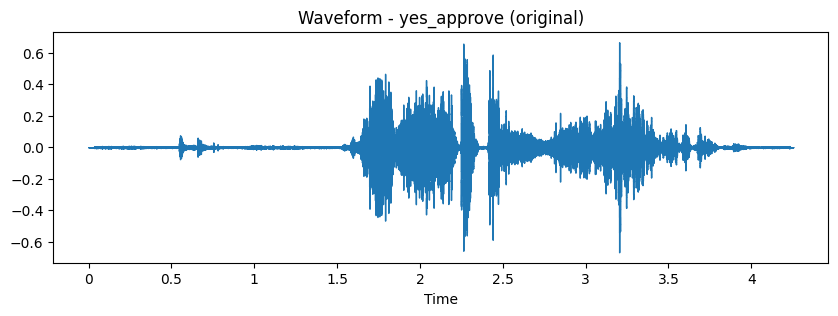

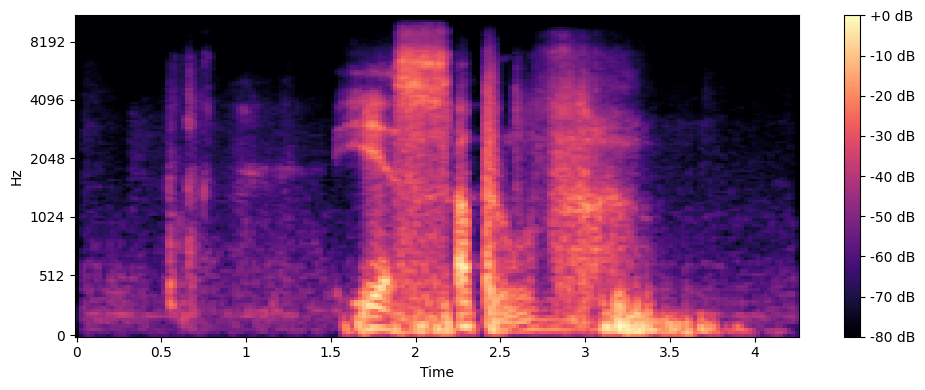

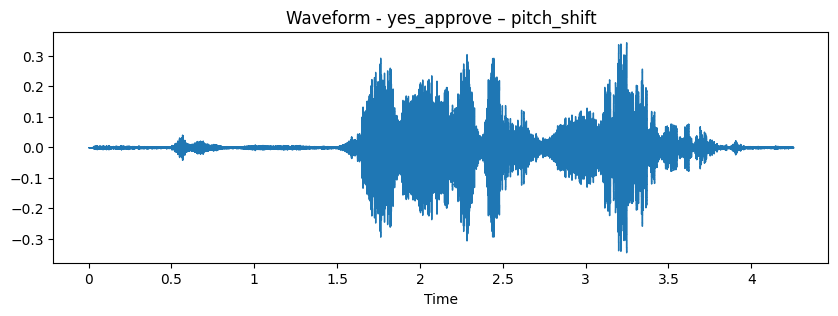

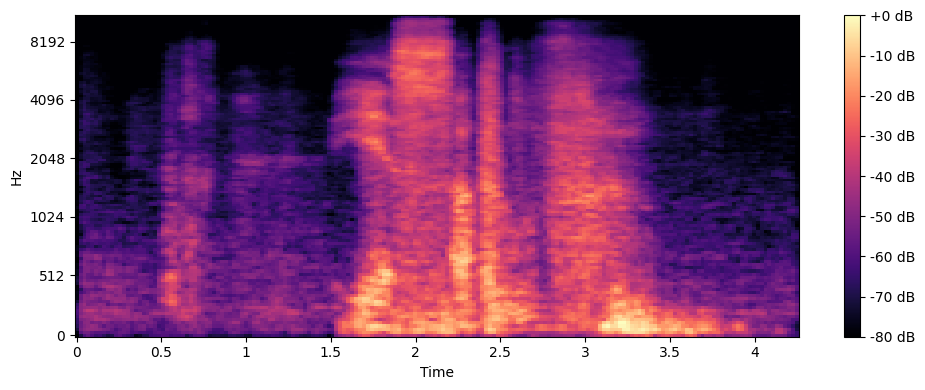

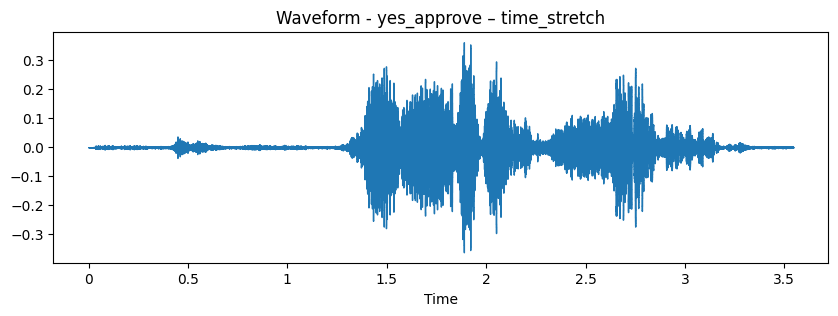

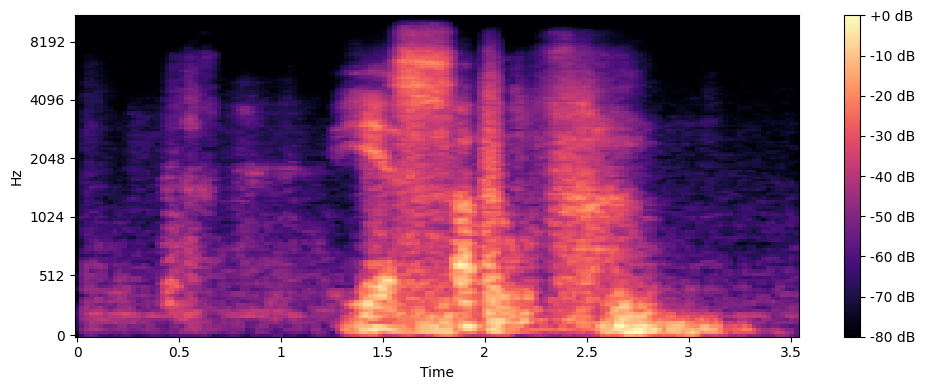

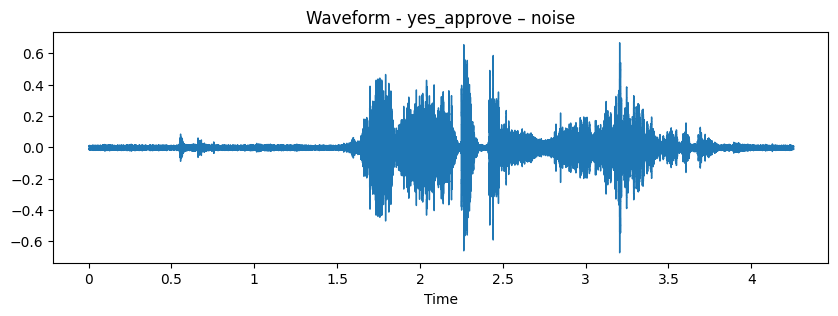

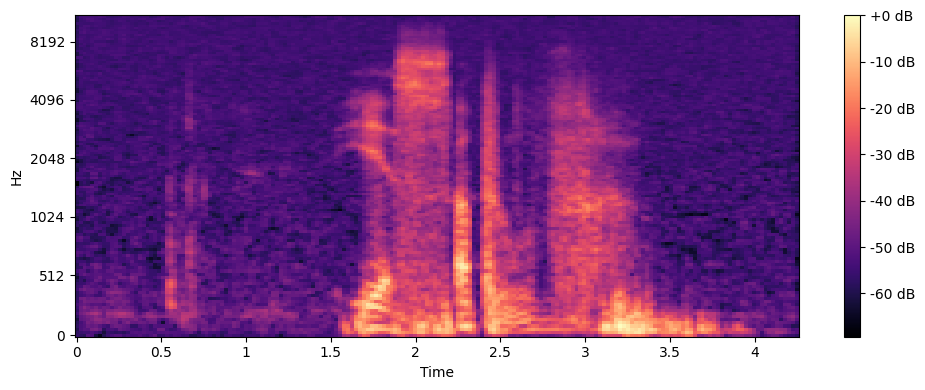

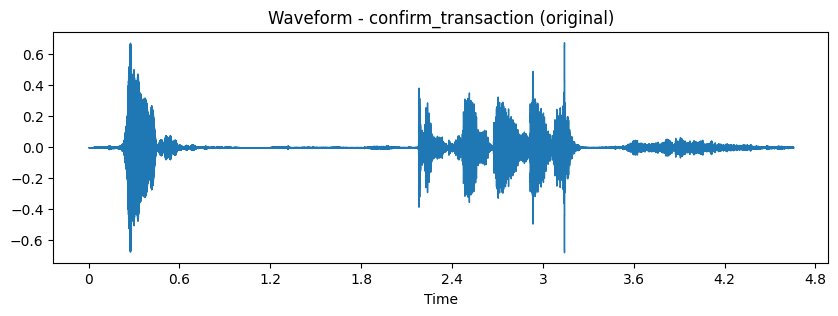

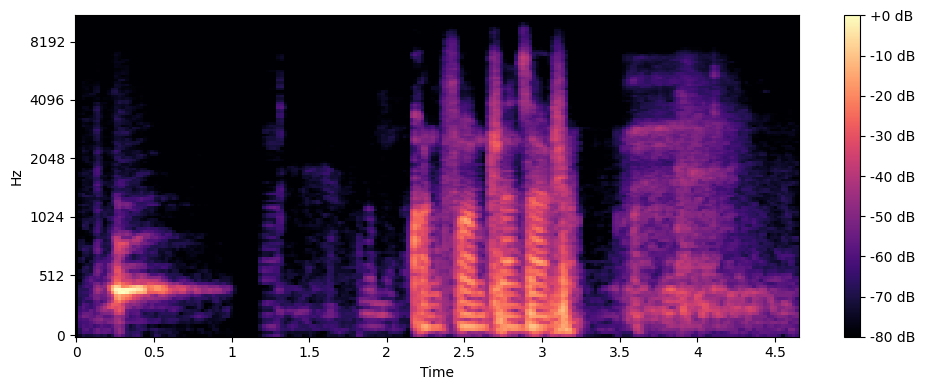

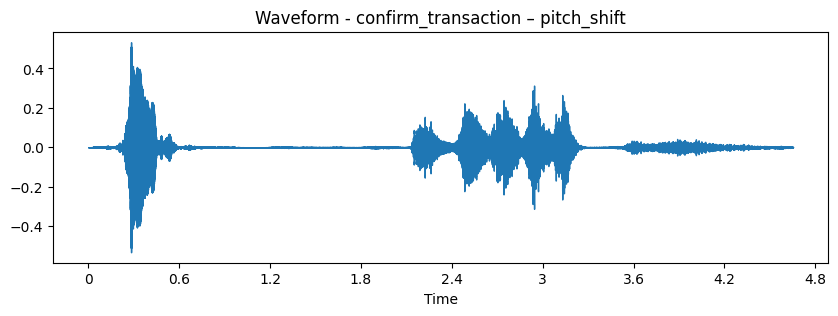

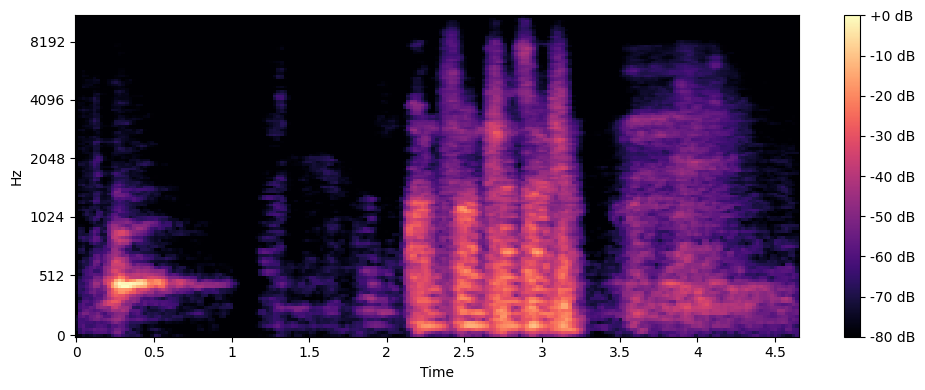

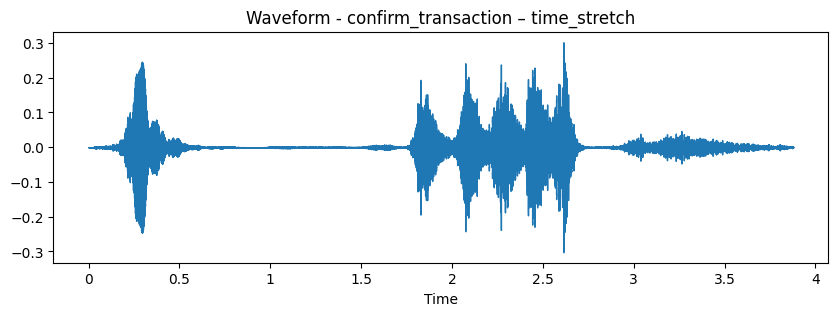

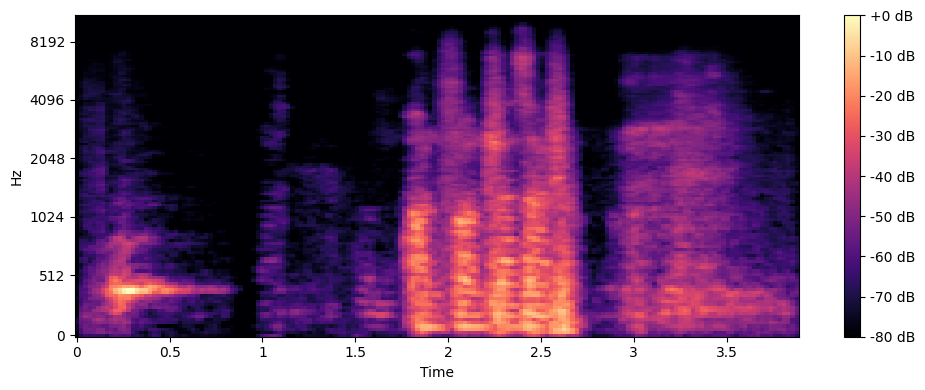

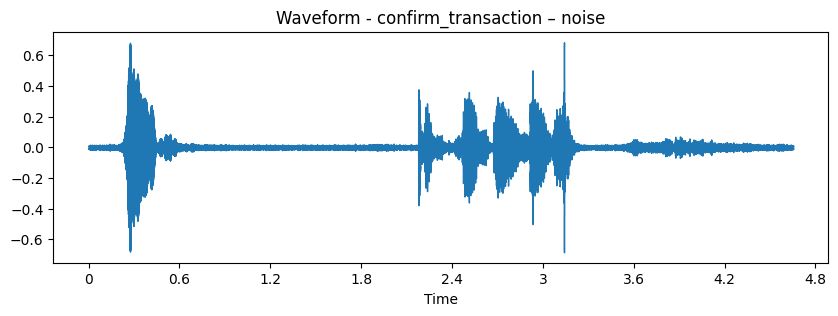

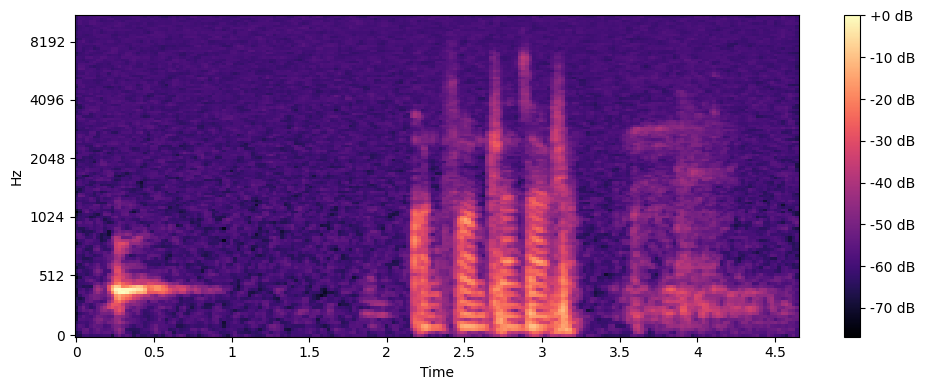

In [7]:
all_features = []

for label, path in audio_paths.items():
    y, sr = librosa.load(path, sr=22050)

    # Visualize original
    plot_waveform(y, sr, f"{label} (original)")
    plot_spectrogram(y, sr, f"{label} (original)")

    # Extract original features
    all_features.append(extract_features(y, sr, f"{label}_original"))

    # Augment audio
    augmented = augment_audio(y, sr)

    for aug_name, aug_audio in augmented.items():
        plot_waveform(aug_audio, sr, f"{label} – {aug_name}")
        plot_spectrogram(aug_audio, sr, f"{label} – {aug_name}")

        all_features.append(
            extract_features(aug_audio, sr, f"{label}_{aug_name}")
        )

## Saving audios

In [8]:
df = pd.DataFrame(all_features)
df.to_csv("audio_features.csv", index=False)

print("Saved: audio_features.csv")
df.head()

Saved: audio_features.csv


,label,rolloff,energy,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12
0,yes_approve_original,2837.292082,436.744324,-341.954559,117.790955,0.224619,40.040741,2.650119,11.674496,3.070583,5.492224,-5.267673,2.316550,0.475069,0.011621,-1.154395
1,yes_approve_pitch_shift,3235.129713,213.073532,-363.300201,109.206009,4.375546,36.289093,-0.983137,10.650209,0.292621,0.549357,-5.615311,4.522574,-2.650427,-0.524173,-3.261542
2,yes_approve_time_stretch,2894.315832,161.384064,-373.630524,120.109299,-2.738952,43.405792,1.101823,13.087620,2.501979,4.720119,-6.255250,2.693808,-0.180439,0.020150,-1.154407
3,yes_approve_noise,7163.769001,438.876119,-234.776318,47.838884,13.020410,21.826430,8.160321,8.860322,6.675216,3.429340,-1.027647,0.625971,1.304420,1.380501,-0.885715
4,confirm_transaction_original,2647.834072,413.337433,-393.151978,95.125175,9.987350,18.914751,1.328956,-2.005090,-3.756305,-1.711384,-11.932697,-11.380055,-4.780184,-6.595197,-6.328534
